# **California Median House Price** : Linear Regression Model 

By [Dito Wicaksana P.](https://github.com/ditoowp) | Data Resource: [Kaggle](https://www.kaggle.com/datasets/shibumohapatra/house-price/data)

<center><img src="https://www.cato.org/sites/cato.org/files/styles/optimized/public/2021-08/California-suburbs.jpg?itok=6V7c2VMd"/></center>

---

## Introduction

<p style="text-align: justify;">
Pasar perumahan di California dikenal dengan volatilitas dan harga tinggi, dipengaruhi oleh faktor seperti pertumbuhan ekonomi, urbanisasi, dan tren demografis. Memahami pola-pola ini dapat memberikan wawasan tentang faktor-faktor yang mendorong perubahan harga, membantu para pemangku kepentingan seperti pembuat kebijakan, investor, dan calon pemilik rumah untuk membuat keputusan yang tepat.
</p>
<p style="text-align: justify;">
Nilai median disini yang dicari karena ingin melihat nilai tengah dari seluruh harga rumah dalam blok. Apabila menggunakan mean maka harga rata-rata rumah dalam blok akan jauh lebih tinggi ketimbang menggunakan median.
</p>

## Objective

<p style="text-align: justify;">
Tujuan dari proyek ini adalah mengembangkan model prediksi yang dapat secara akurat memperkirakan harga rumah median berdasarkan fitur yang ada. Dengan memanfaatkan teknik pembelajaran mesin, model ini bertujuan untuk:
</p>

* Mengidentifikasi faktor utama yang mempengaruhi harga rumah
* Memberikan prediksi harga yang akurat untuk membantu dalam pengambilan keputusan.
* Mengeksplorasi bagaimana perubahan dalam fitur tertentu mempengaruhi keterjangkauan dan ketersediaan perumahan.

<p style="text-align: justify;">
Tujuan utamanya adalah menawarkan <em>tools<em> yang dapat mendukung analisis <em>real estate</em> dan perencanaan strategis di sektor perumahan.
</p>

## Importing Libraries Needed

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Training model
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, kendalltau
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Saving model
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Define dataframe
data_raw = pd.read_csv('california-house-medprice.csv')

In [3]:
# Display dataframe
data_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


Disini hanya menggunakan 5000 rows saja agar mempercepat waktu *training* nanti.

In [4]:
# Limit 5000 rows (random)
df = data_raw.sample(n=5000, random_state=40) # Mengambil 5000 sample secara random

# Reset index agar lebih rapih setelah mengambil sample
df.reset_index(drop=True, inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-118.14,34.18,47,3457,622.0,1700,579,3.5164,<1H OCEAN,226500
1,-121.97,37.54,31,1949,344.0,986,322,4.6349,<1H OCEAN,196200
2,-123.84,39.83,19,1461,340.0,515,227,1.5278,NEAR OCEAN,145800
3,-121.82,36.86,17,1573,272.0,142,55,2.1719,NEAR OCEAN,420000
4,-118.33,34.05,48,2405,527.0,1868,502,3.3750,<1H OCEAN,257800
...,...,...,...,...,...,...,...,...,...,...
4995,-118.27,33.77,26,2272,694.0,2567,595,1.9964,NEAR OCEAN,150600
4996,-120.10,39.20,20,1703,294.0,409,174,3.0870,INLAND,196900
4997,-119.25,34.21,12,15201,2418.0,7132,2251,5.6756,NEAR OCEAN,301800
4998,-117.99,33.93,33,2299,431.0,1049,447,3.6458,<1H OCEAN,208100


In [5]:
# Display infomation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           5000 non-null   float64
 1   latitude            5000 non-null   float64
 2   housing_median_age  5000 non-null   int64  
 3   total_rooms         5000 non-null   int64  
 4   total_bedrooms      4946 non-null   float64
 5   population          5000 non-null   int64  
 6   households          5000 non-null   int64  
 7   median_income       5000 non-null   float64
 8   ocean_proximity     5000 non-null   object 
 9   median_house_value  5000 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 390.8+ KB


Terdapat 9 kolom numerikal dan 1 kolom kategorikal. Pada `total_bedrooms` terdapat *missing values*, nanti akan dicek terlebih dahulu dan selanjutnya akan di-*handle*.

Dataset terdiri dari beberapa kolom, berikut adalah deskripsi dari masing-masing kolom:
* `longitude` : Koordinat nilai bujur
* `latitude` : Koordinat nilai lintang
* `housing_median_age` : Median usia rumah dalam blok
* `total_rooms` : Total kamar (tidak termasuk kamar tidur) dalam blok
* `total_bedrooms` : Total kamar tidur dalam blok
* `population` : Total populasi dalam blok
* `households` : Jumlah rumah tangga dalam blok
* `median_income` : Median total pendapatan dari satu rumah tangga dalam blok
* `ocean_proximity` : Landscape dari blok
* `median_house_value` : Median harga rumah dalam blok

Disini yang akan diprediksi atau yang menjadi target adalah kolom `median_house_value`.

In [6]:
# Display shape dataframe
df.shape

(5000, 10)

In [7]:
# Check duplicates
df.duplicated().sum()

0

Tidak terdapat kolom yang *duplicate*.

In [8]:
# Check missing values
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        54
population             0
households             0
median_income          0
ocean_proximity        0
median_house_value     0
dtype: int64

Terdapat *missing values* pada `total_bedrooms`, ini mungkin termasuk *missing values* tipe **Missing Completely at Random** (MCAR). Diasumsikan karena saat input data mungkin terlewat atau yang memasukkan data berpikir kalau `total_rooms` sudah termasuk kamar tidur, sehingga tidak memasukkan data `total_bedrooms`.

Untuk *handling* sendiri karena jumlah *missing values* hanya pada kolom `total_bedrooms` dan sedikit juga jumlahnya, maka akan dilakukan *handling* berupa imputasi. Imputasi menggunakan mean atau median tergantung distribusi data-nya seperti apa yang nanti akan dicek di tahap **Feature Engineering**.

## Exploratory Data Analysis (EDA)

### Housing Median Age

In [9]:
# Summary statistic housing median age
summ_median_age = df.agg({
    'housing_median_age': ['mean', 'median', 'std']}).reset_index()

print('Summary Stats for Housing Median Age')
print(summ_median_age)

Summary Stats for Housing Median Age
    index  housing_median_age
0    mean           28.785800
1  median           29.000000
2     std           12.806464


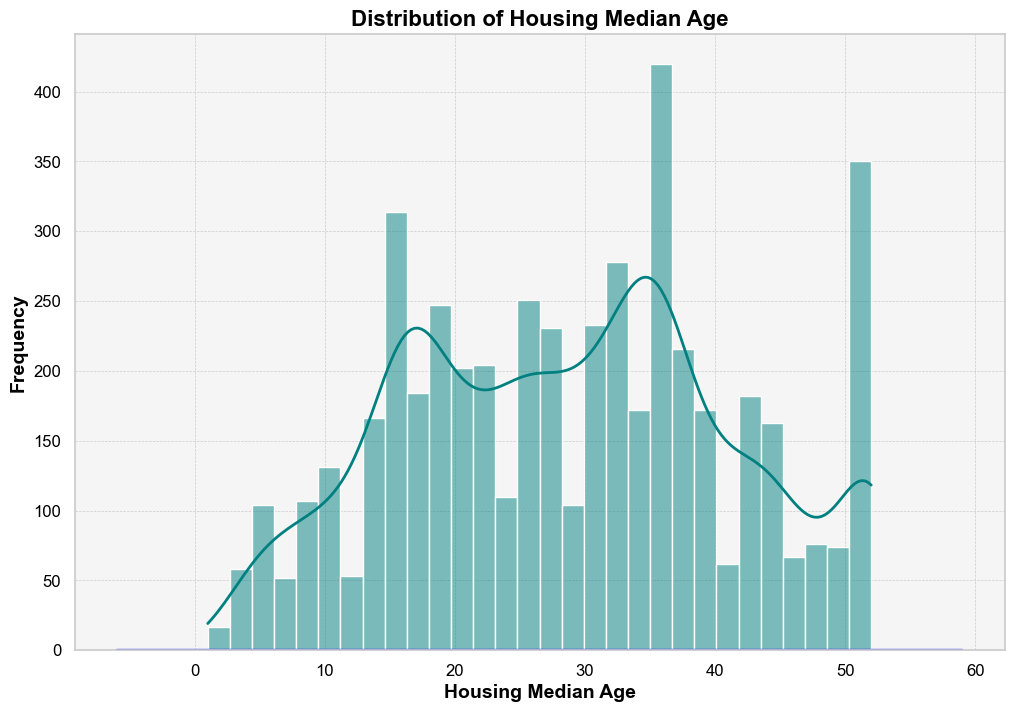

In [10]:
# Histogram housing median age

# Set style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", as_cmap=True)

# Create the plot
plt.figure(figsize=(12, 8))
sns.histplot(df['housing_median_age'], bins=30, kde=True, color='teal', line_kws={'linewidth': 2})
plt.title('Distribution of Housing Median Age', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Housing Median Age', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

# Customize KDE line
sns.kdeplot(df['housing_median_age'], color='blue', linewidth=2)

# Customize the ticks and their labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.show()

Median umur rumah pada blok antara 30 - 40 tahun yang menunjukkan bahwa jumlah rumah dengan usia 30 - 40 tahun keatas sama banyaknya dengan jumlah rumah dengan usia rumah 30 - 40 tahun kebawah. Ini menunjukkan bahwa untuk *potential buyer* bahwa pilihan usia rumah seimbang antara rumah yang masih baru dan rumah yang sudah lama. Sehingga, mereka menjadi mempunyai banyak pilihan untuk usia rumahnya. 

### Total Rooms

In [11]:
# Summary statistics total rooms
summ_total_rooms = df.agg({
    'total_rooms': ['mean', 'median', 'std']}).reset_index()

print('Summary Stats for Total Rooms')
print(summ_total_rooms)

Summary Stats for Total Rooms
    index  total_rooms
0    mean  2629.841000
1  median  2126.500000
2     std  2166.585744


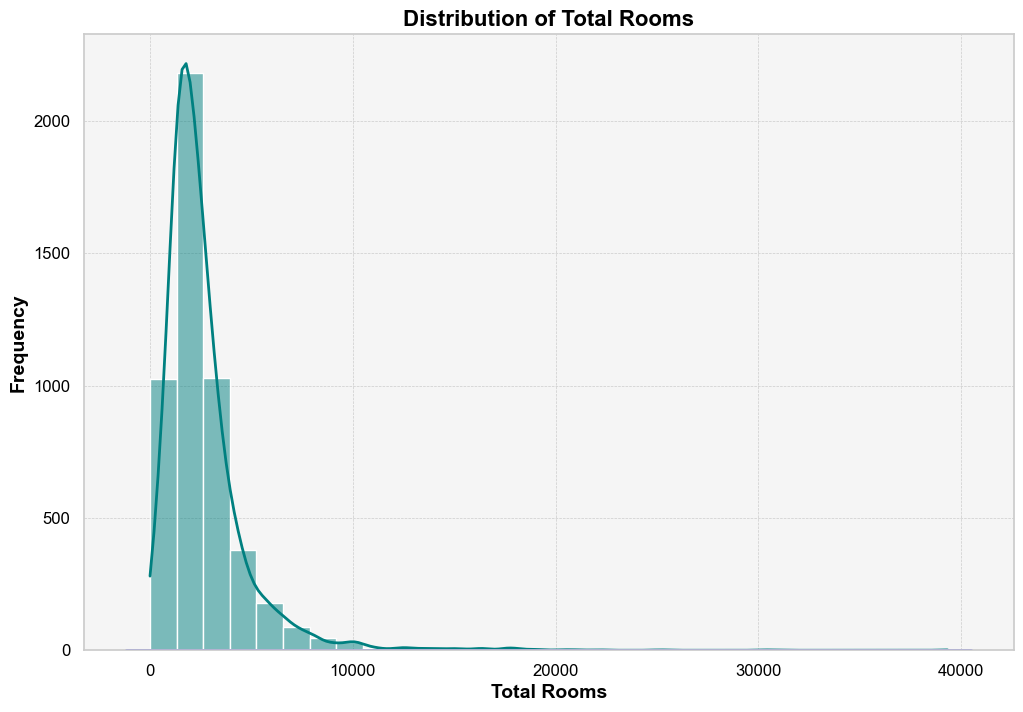

In [12]:
# Histogram total rooms
plt.figure(figsize=(12, 8))
sns.histplot(df['total_rooms'], bins=30, kde=True, color='teal', line_kws={'linewidth': 2})
plt.title('Distribution of Total Rooms', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Total Rooms', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

# Customize KDE line
sns.kdeplot(df['total_rooms'], color='blue', linewidth=2)

# Customize the ticks and their labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.show()

Berdasarkan visualisasi, kebanyakan rumah sepertinya rumah yang kecil dikarenakan jumlah ruangannya yang sedikit, namun ada beberapa rumah yang memiliki ruangan yang banyak juga. Walaupun, jumlahnya jauh lebih sedikit. Jadi, *potential buyer* kebanyakan hanya memiliki pilihan rumah yang kecil.

Pada visualisasi juga terdapat *tail* yang menandakan adanya *outliers*. Untuk *handling*, perlu dicek terlebih dahulu persentase *outliers*-nya agar tahu bagaimana *handling*-nya.

### Total Bedrooms

In [13]:
# Summary statistics total bedrooms
summ_total_bedrooms = df.agg({
    'total_bedrooms': ['mean', 'median', 'std']}).reset_index()

print('Summary Stats for Total Bedrooms')
print(summ_total_bedrooms)

Summary Stats for Total Bedrooms
    index  total_bedrooms
0    mean      535.127780
1  median      431.500000
2     std      421.456564


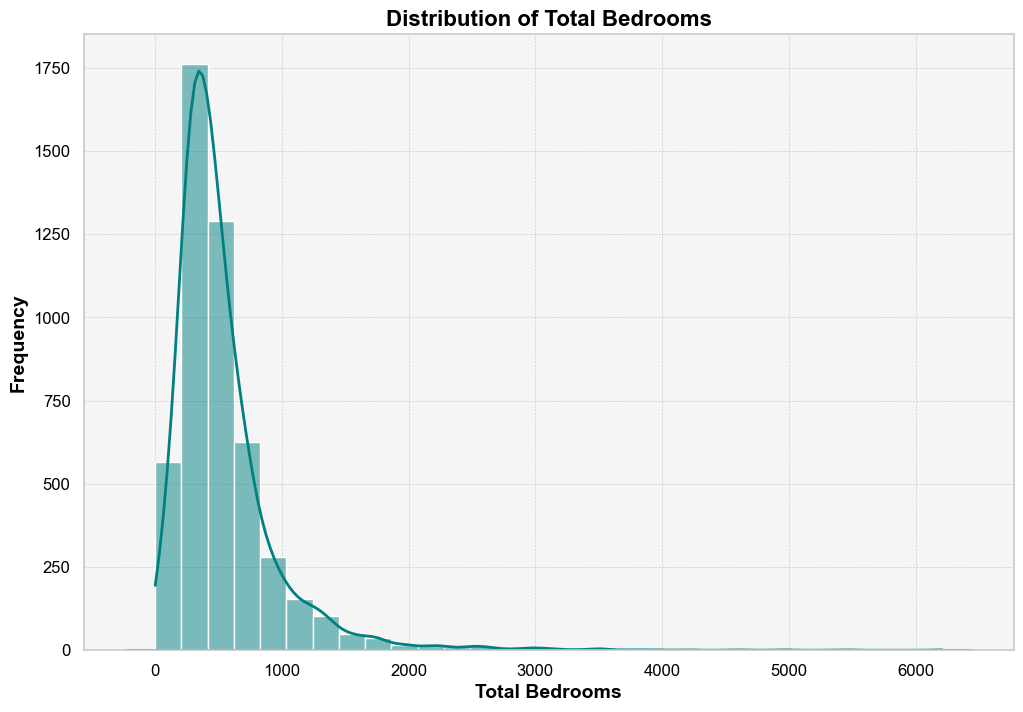

In [14]:
# Histogram total bedrooms
plt.figure(figsize=(12, 8))
sns.histplot(df['total_bedrooms'], bins=30, kde=True, color='teal', line_kws={'linewidth': 2})
plt.title('Distribution of Total Bedrooms', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Total Bedrooms', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

# Customize KDE line
sns.kdeplot(df['total_bedrooms'], color='blue', linewidth=2)

# Customize the ticks and their labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.show()

Sama halnya juga dengan `total_rooms`, kebanyakan rumah sepertinya rumah yang kecil dikarenakan jumlah kamar tidurnya yang sedikit. Namun ada juga rumah yang memiliki jumlah kamar tidur yang banyak, menandakan ada juga rumah yang besar dengan kamar tidur yang lebih banyak.

### Population

In [15]:
# Summary statistics population
summ_population = df.agg({
    'population': ['mean', 'median', 'std']}).reset_index()

print('Summary Stats for Population')
print(summ_population)

Summary Stats for Population
    index   population
0    mean  1416.846800
1  median  1160.500000
2     std  1090.146672


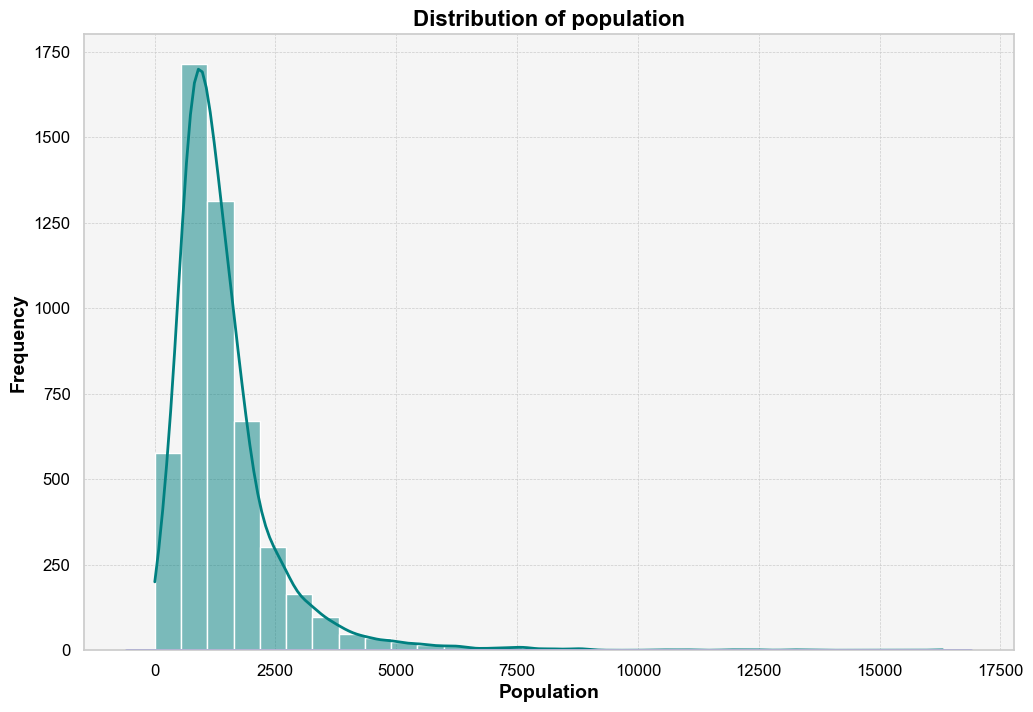

In [16]:
# Histogram population
plt.figure(figsize=(12, 8))
sns.histplot(df['population'], bins=30, kde=True, color='teal', line_kws={'linewidth': 2})
plt.title('Distribution of population', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Population', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')

# Customize grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('whitesmoke')

# Customize KDE line
sns.kdeplot(df['population'], color='blue', linewidth=2)

# Customize the ticks and their labels
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.show()

Kebanyakan blok memiliki populasi antara 500 - 2500 orang. 

### Ocean Proximity (*Landscape*)

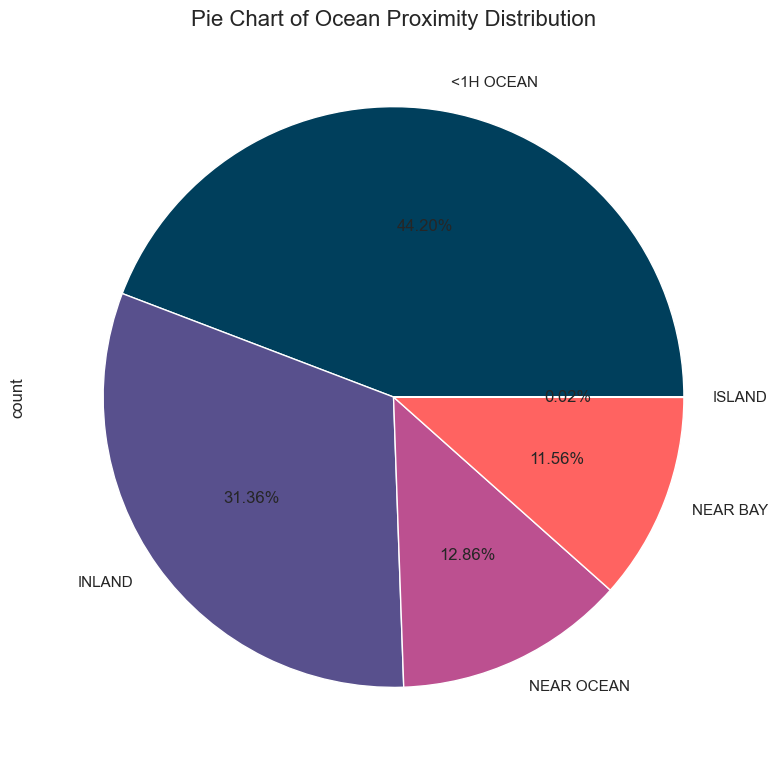

In [17]:
# Pie chart ocean proximity (landscape)

# Get pie chart data
pie_chart_data = df['ocean_proximity'].value_counts()

# Create colors list
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

# Create pie chart with customizations
fig, ax1 = plt.subplots(figsize=(8, 8))
pie_chart = pie_chart_data.plot(kind='pie', autopct='%.2f%%', ax=ax1, colors=colors)

plt.title("Pie Chart of Ocean Proximity Distribution", fontsize=16)
plt.tight_layout()
plt.show()

Kebanyakan rumah sepertinya berada di area sekitar pantai dan ada juga kecil persentase yang berada di pulau. 

### Median House Value vs. Population and Ocean Proximity

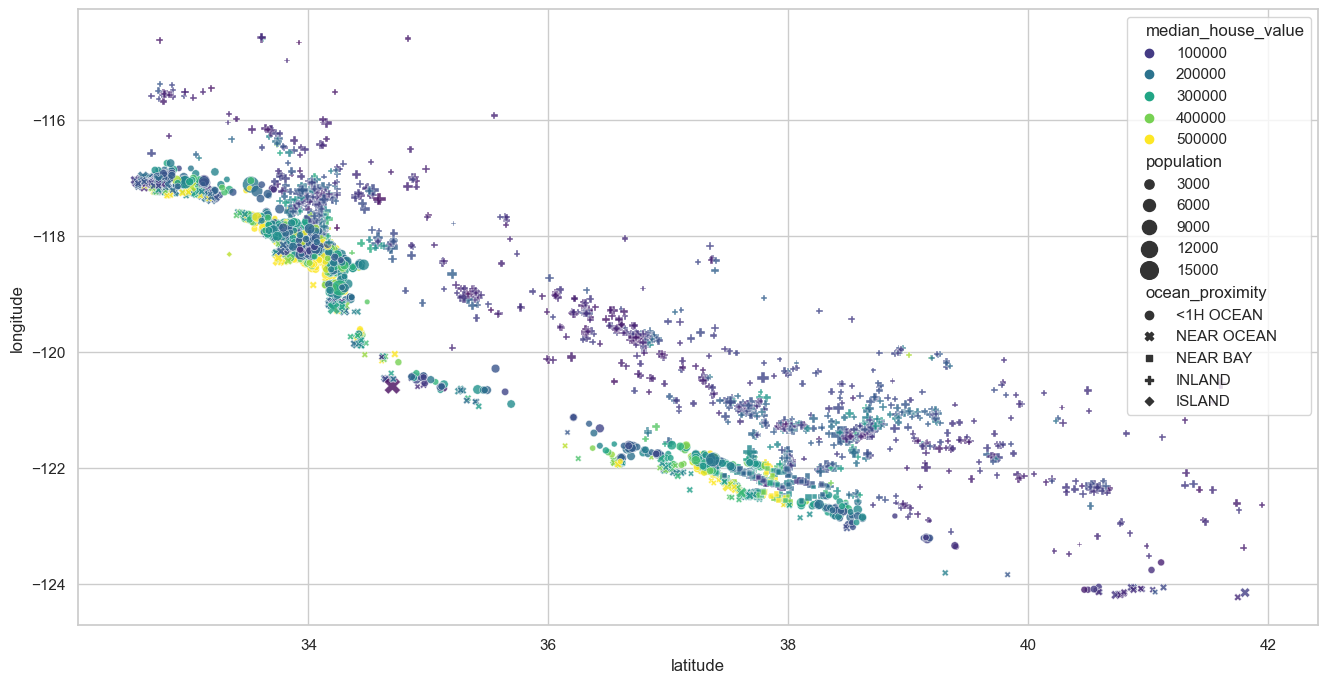

In [18]:
# Scatter plot
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x='latitude', y='longitude', 
                hue='median_house_value', size='population', 
                sizes=(15, 175), style='ocean_proximity',
                palette='viridis',alpha=0.8
                )

plt.show()

Dari visualisasi dapat diketahui bahwa ada korelasi positif antara `median_house_value` terhadap `population` yang menandakan bahwa semakin banyak total populasi pada suatu blok maka akan semakin tinggi juga median harga rumah. Namun, ada beberapa data yang menunjukkan populasi yang tinggi tetapi median harga rumahnya rendah. Ini mungkin rumah tersebut kecil sehingga harganya juga menjadi rendah.Selain itu, `ocean_proximity` atau *landscape* blok juga memiliki korelasi terhadap `median_house_value`. Dapat dilihat bahwa kebanyakan rumah dengan *range* harga 200.000$ - 500.000$ berada pada daerah yang dekat pantai.

### Median Income vs. Median House Value

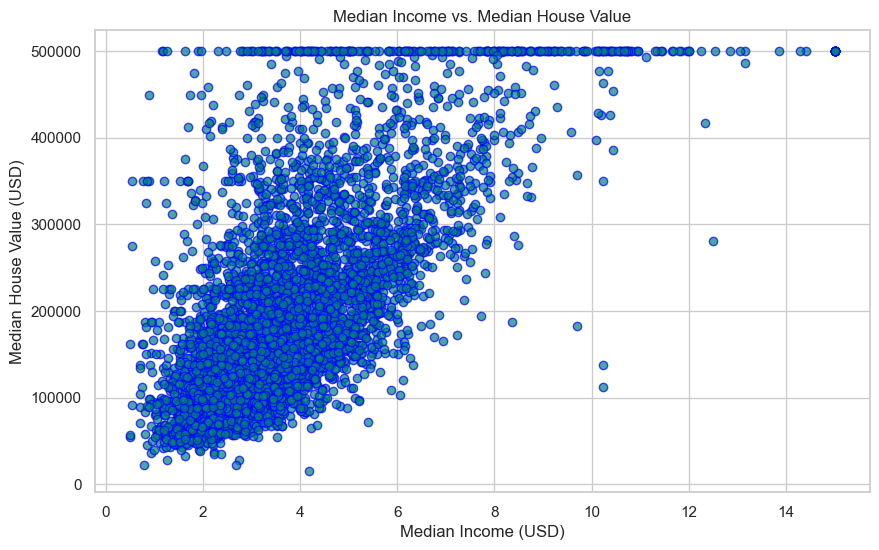

In [19]:
# Scatter plot income vs. house value
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], color='teal', marker='o', edgecolors='blue', alpha=0.7)
plt.xlabel("Median Income (USD)")
plt.ylabel("Median House Value (USD)")
plt.title("Median Income vs. Median House Value")
plt.grid(True)
plt.show()

Pada visualisasi, dapat dilihat bahwa semakin tinggi *income* semakin tinggi juga harga rumah. Jadi dapat disimpulkan, `median_income` dan `median_house_value` memiliki korelasi. Ada beberapa penjelasan untuk korelasi ini:

* *Demand* : Blok dengan *income* yang tinggi cenderung memiliki penduduk yang mampu membeli rumah yang relatif mahal. Sehingga meningkatkan *demand* perumahan di blok tersebut yang dapat meningkatkan harga.
* *Affordability* : Karena penduduk pada blok tersebut memiliki *income* yang tinggi maka mereka dapat membeli rumah dengan harga yang lebih tinggi juga.
* Lokasi : Blok dengan median harga rumah yang tinggi mungkin memiliki fasilitas yang baik. Seperti sekolah yang bagus dan lingkungan yang aman.

### Correlation Matrix

In [20]:
# Define dataframe numerical
dfnumeric = df.select_dtypes(exclude=['object'])

# Display dataframe numerical
dfnumeric.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

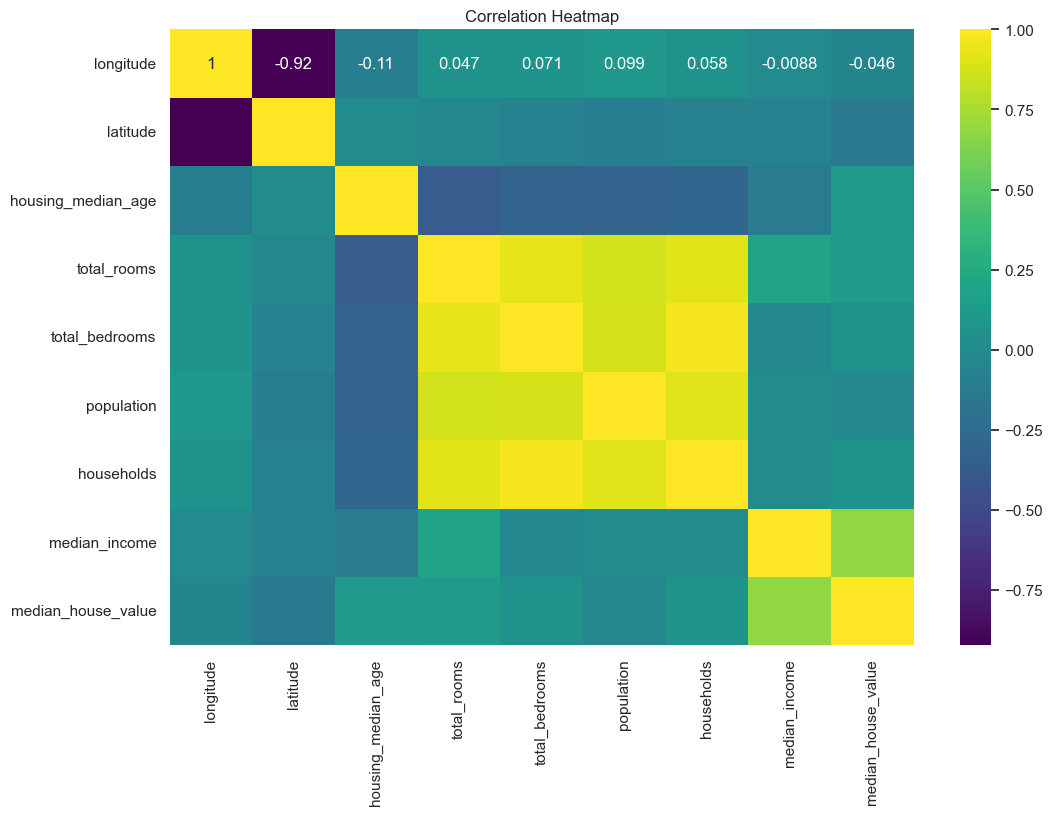

In [21]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dfnumeric.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

*Correlation Matrix* menunjukkan hal yang sama seperti visualisasi yang telah dilakukan diatas. `median_income` dan `median_house_value` memiliki korelasi yang tinggi. Selain itu sepertinya semua *features* memiliki korelasi terhadap `median_house_value` atau *target*.

## Feature Engineering

### Handling Cardinality

In [22]:
# Defining categorical features
cat_col = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_col:
    listItem.append([col, df[col].nunique(), df[col].unique()]) 

# Add to dataframe to show unique value
pd.DataFrame(columns=['Nama Kolom', 'Jumlah Value Unique', 'Value Unique'], data=listItem)

,Nama Kolom,Jumlah Value Unique,Value Unique
0,ocean_proximity,5,"[<1H OCEAN, NEAR OCEAN, NEAR BAY, INLAND, ISLAND]"


Tingkat *cardinality* tidak terlalu tinggi dan `ocean_proximity` menunjukkan *landscape* dari perumahan pada blok, selain itu juga pada **EDA** menunjukkan bahwa ada korelasi terhadap *target*. Tidak perlu dilakukan *handling* atau dibiarkan saja.

### Handling Outliers

In [23]:
# Display outliers percentage
num_train = df._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column longitude outliers = 0.00%
Column latitude outliers = 0.00%
Column housing_median_age outliers = 0.00%
Column total_rooms outliers = 6.34%
Column total_bedrooms outliers = 6.42%
Column population outliers = 6.12%
Column households outliers = 6.10%
Column median_income outliers = 3.56%
Column median_house_value outliers = 5.54%


Persentase *outliers* tidak terlalu tinggi pada masing-masing *features*. Disini diputuskan untuk membiarkan *outliers* tersebut dikarenakan data merupakan informasi perumahan pada suatu blok (data penting), jadi diasumsikan *outliers* tersebut merupakan data yang normal dengan *value* yang tinggi saja.

### Handling Missing Values

Sebelumnya sudah diketahui terdapat *missing value* pada `total_bedrooms`. Untuk mengetahui *handling*-nya bagaimana, perlu mengetahui terlebih dahulu distribusi data-nya seperti apa.

In [24]:
# Display missing values
df.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        54
population             0
households             0
median_income          0
ocean_proximity        0
median_house_value     0
dtype: int64

In [25]:
# Display skewness feature minimum payments
skew_total_bedrooms = df['total_bedrooms'].skew()
print(f'Skewness for total_bedrooms is: {skew_total_bedrooms}')

Skewness for total_bedrooms is: 3.567311977742491


`total_bedrooms` memiliki *positive skewness*. Untuk itu akan dilakukan imputasi menggunakan median.

In [26]:
# Handling missing values using median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [27]:
# Display missing values after handling
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Split Dependent and Independent Variables

In [28]:
# Split 'X' dan 'y'
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

# Display X
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.14,34.18,47,3457,622.0,1700,579,3.5164,<1H OCEAN
1,-121.97,37.54,31,1949,344.0,986,322,4.6349,<1H OCEAN
2,-123.84,39.83,19,1461,340.0,515,227,1.5278,NEAR OCEAN
3,-121.82,36.86,17,1573,272.0,142,55,2.1719,NEAR OCEAN
4,-118.33,34.05,48,2405,527.0,1868,502,3.3750,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
4995,-118.27,33.77,26,2272,694.0,2567,595,1.9964,NEAR OCEAN
4996,-120.10,39.20,20,1703,294.0,409,174,3.0870,INLAND
4997,-119.25,34.21,12,15201,2418.0,7132,2251,5.6756,NEAR OCEAN
4998,-117.99,33.93,33,2299,431.0,1049,447,3.6458,<1H OCEAN


### Split Train-Set and Test-Set

In [29]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Check shape train-set dan test-set 
print('Train-Set Size: ', X_train.shape)
print('Test-Set Size: ', X_test.shape)

Train-Set Size:  (4000, 9)
Test-Set Size:  (1000, 9)


### Feature Selection

Sebelumnya pada tahap **EDA** bagian *Correlation Matrix* diketahui bahwa semua *features* memiliki korelasi terhadap *target*. Tapi untuk konfirmasi lagi korelasinya akan dilakukan pengecekan korelasi menggunakan **KendallTau** untuk *feature* kategorikal dan **Pearson** untuk *features* numerikal.

In [30]:
# Split categorical dan numerical
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()

num_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [31]:
## Train-Set
X_train_cat = X_train[cat_columns]
X_train_num = X_train[num_columns]

## Test-Set
X_test_cat = X_train[cat_columns]
X_test_num = X_train[num_columns]

In [32]:
# Categorical feature correlation to target
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
    corr_coef, p_value = kendalltau(X_train_cat[col], y_train) 

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('Ada Korelasi')
    else:
        interpretasi.append('Tidak Ada Korelasi')

pd.DataFrame({'Nama Kolom': cols,
              'Hasil': interpretasi})

,Nama Kolom,Hasil
0,ocean_proximity,Ada Korelasi


In [33]:
# Numerical feature correlation to target
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
    corr_coef, p_value = pearsonr(X_train_num[col], y_train) 

    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('Ada Korelasi')
    else:
        interpretasi.append('Tidak Ada Korelasi')

pd.DataFrame({'Nama Kolom': cols,
              'Hasil': interpretasi})

,Nama Kolom,Hasil
0,longitude,Ada Korelasi
1,latitude,Ada Korelasi
2,housing_median_age,Ada Korelasi
3,total_rooms,Ada Korelasi
4,total_bedrooms,Ada Korelasi
5,population,Ada Korelasi
6,households,Ada Korelasi
7,median_income,Ada Korelasi


Jadi sesuai dengan *heatmap* yang ada pada **EDA**, semua *features* memiliki korelasi terhadap *target*.

### Column Transformer

In [34]:
# Preprocessing numerical data
num_pipe = Pipeline(steps=[('scaler', MinMaxScaler())])

# Preprocessing categorical data
cat_pipe = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

*Scaling* menggunakan **MinMaxScaler** dikarenakan data bukan *gaussian*. Untuk *feature* kategorikal menggunakan **OneHotEncoder** dikarenakan untuk menghindari terjadinya hubungan ordinal yang tidak diinginkan dan memungkinakan algoritma menanganani data kategorikal dengan sesuai.

In [35]:
# Defining numerical and categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Display num cols
num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [36]:
# Define preprocessor untuk numerikal dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])

## Model Definition

Membuat *pipeline* model menggunakan **SVR**, **KNeighborsRegressor**, **DecisionTreeRegressor**, **RandomForestRegressor**, dan **XGBRegressor**.

In [37]:
# Pipeline SVR
pipe_svr = Pipeline([('preprocessing', preprocessor), ('svr', SVR())])

# Pipeline KNeigbors
pipe_knr = Pipeline([('preprocessing', preprocessor), ('knr', KNeighborsRegressor())])

# Pipeline Decision Tree
pipe_dtr = Pipeline([('preprocessing', preprocessor), ('dtr', DecisionTreeRegressor())])

# Pipeline Random Forest
pipe_rfr = Pipeline([('preprocessing', preprocessor), ('rfr', RandomForestRegressor())])

# Pipeline XGBoost
pipe_xgb = Pipeline([('preprocessing', preprocessor), ('xgb', XGBRegressor())])

*Metrics* yang akan digunakan adalah **MSE**, **RMSE**, dan **R2**. **MSE** dan **RMSE** digunakan karena yang mau diprediksi adalah `median_house_value` yang mana harus meminimalisir *error*. **R2** yamg akan difokuskan untuk membandingkan kemampuan prediksi model yang digunakan dan memamahami *fit*-nya secara keseluruhan.

## Model Training

### SVR

In [38]:
# Fitting model
pipe_svr.fit(X_train, y_train)

# Check waktu model training
%time pipe_svr.fit(X_train, y_train)

CPU times: total: 750 ms
Wall time: 829 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('svr', SVR())])

In [39]:
# Evaluate using MSE, RMSE, and R2

## Predict train-set and test-set
y_train_pred = pipe_svr.predict(X_train)
y_test_pred = pipe_svr.predict(X_test)

## Menghitung metrics untuk train-set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

## Menghitung metrics untuk test-set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print('MSE - Train Set:', round(train_mse,4))
print('RMSE - Train Set:', round(train_rmse, 4))
print('R2 - Train Set:', round(train_r2, 4))
print('================================')
print('MSE - Test Set:', round(test_mse, 4))
print('RMSE - Test Set:', round(test_rmse, 4))
print('R2 - Test Set:', round(test_r2, 4))

MSE - Train Set: 14381449263.9183
RMSE - Train Set: 119922.6804
R2 - Train Set: -0.0571
MSE - Test Set: 14319496499.5359
RMSE - Test Set: 119664.0986
R2 - Test Set: -0.0368


* **MSE**, menunjukkan *good fit*, namun *value*-nya sangat tinggi yang menunjukkan bahwa model tidak memberikan prediksi yang akurat.

* **RMSE**, menunjukkan *good fit* juga dengan *value*-nya yang tinggi juga sehingga model tidak dapat memberikat prediksi yang akurat.

* **R2** , nilai negatif yang menunjukkan kinerja model lebih buruk daripada prediksi mean sederhana. Nilainya yang lebih tinggi pada *train* dan lebih rendah pada *test* menunjukkan bahwa model tidak dapat menangkap varians dalam variabel target secara efektif.

### KNeighbors

In [40]:
# Fitting model
pipe_knr.fit(X_train, y_train)

# Check waktu model training
%time pipe_knr.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 16.9 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('knr', KNeighborsRegressor())])

In [41]:
# Evaluate using MSE, RMSE, and R2

## Predict train-set and test-set
y_train_pred = pipe_knr.predict(X_train)
y_test_pred = pipe_knr.predict(X_test)

## Menghitung metrics untuk train-set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

## Menghitung metrics untuk test-set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print('MSE - Train Set:', round(train_mse, 4))
print('RMSE - Train Set:', round(train_rmse, 4))
print('R2 - Train Set:', round(train_r2, 4))
print('================================')
print('MSE - Test Set:', round(test_mse, 4))
print('RMSE - Test Set:', round(test_rmse, 4))
print('R2 - Test Set:', round(test_r2, 4))

MSE - Train Set: 2918931779.6307
RMSE - Train Set: 54027.1393
R2 - Train Set: 0.7854
MSE - Test Set: 4746585227.8919
RMSE - Test Set: 68895.4659
R2 - Test Set: 0.6563


* **MSE**, menunjukkan *under fit* dan *value*-nya sangat tinggi. *Value* pada *test* lebih tinggi menunjukkan bahwa kinerja model cukup buruk terhadap data yang belum pernah dilihat. 

* **RMSE**, menunjukkan *under fit* dan *value*-nya sangat tinggi. *Value* pada *test* lebih tinggi menunjukkan bahwa kinerja model cukup buruk terhadap data yang belum pernah dilihat. 

* **R2** , nilai *test* lebih rendah. Namun, ini masih cukup baik dikarenakan pada *test*, model dapat menangkap 65,63% varians pada *test* yang masih dapat di-*improve* lagi.

### Decision Tree

In [42]:
# Fitting model
pipe_dtr.fit(X_train, y_train)

# Check waktu model training
%time pipe_dtr.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 38.7 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('dtr', DecisionTreeRegressor())])

In [43]:
# Evaluate using MSE, RMSE, and R2

## Predict train-set and test-set
y_train_pred = pipe_dtr.predict(X_train)
y_test_pred = pipe_dtr.predict(X_test)

## Menghitung metrics untuk train-set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

## Menghitung metrics untuk test-set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print('MSE - Train Set:', round(train_mse, 4))
print('RMSE - Train Set:', round(train_rmse, 4))
print('R2 - Train Set:', round(train_r2, 4))
print('================================')
print('MSE - Test Set:', round(test_mse, 4))
print('RMSE - Test Set:', round(test_rmse, 4))
print('R2 - Test Set:', round(test_r2, 4))

MSE - Train Set: 0.0
RMSE - Train Set: 0.0
R2 - Train Set: 1.0
MSE - Test Set: 5944589977.257
RMSE - Test Set: 77101.1672
R2 - Test Set: 0.5696


* **MSE**, pada *train* mendapatkan *value* yang baik sekali, tetapi pada *test* *value*-nya tinggi sekali. Ini menunjukkan bahwa model *over fit*.

* **RMSE**, sama halnya juga dengan *metrics* **MSE**. Model menunjukkan *over fit*.

* **R2** , walaupun pada *test* menunjukkan kekuatan prediksi yang lumayan (55,69%), perbedaan yang besar antara *train* dan *test* juga menunjukkan model *over fit*.

### Random Forest

In [44]:
# Fitting model
pipe_rfr.fit(X_train, y_train)

# Check waktu model training
%time pipe_rfr.fit(X_train, y_train)

CPU times: total: 3.33 s
Wall time: 3.51 s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('rfr', RandomForestRegressor())])

In [45]:
# Evaluate using MSE, RMSE, and R2

## Predict train-set and test-set
y_train_pred = pipe_rfr.predict(X_train)
y_test_pred = pipe_rfr.predict(X_test)

## Menghitung metrics untuk train-set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

## Menghitung metrics untuk test-set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print('MSE - Train Set:', round(train_mse, 4))
print('RMSE - Train Set:', round(train_rmse, 4))
print('R2 - Train Set:', round(train_r2, 4))
print('================================')
print('MSE - Test Set:', round(test_mse, 4))
print('RMSE - Test Set:', round(test_rmse, 4))
print('R2 - Test Set:', round(test_r2, 4))

MSE - Train Set: 433278569.5481
RMSE - Train Set: 20815.3446
R2 - Train Set: 0.9682
MSE - Test Set: 3128882285.0829
RMSE - Test Set: 55936.4129
R2 - Test Set: 0.7735


* **MSE**, menunjukkan *under fit* dan *value*-nya sangat tinggi. *Value* pada *test* lebih tinggi menunjukkan bahwa kinerja model cukup buruk terhadap data yang belum pernah dilihat. 

* **RMSE**, sama halnya juga dengan *metrics* **MSE**. Model menunjukkan *under fit*.

* **R2** , pada *train* skornya sangat baik, namun *performance*-nya turun cukup signifikan pada *test*. Walaupun seperti itu, skor **R2** berhasil memprediksi sebanyak 77.56% yang menunjukkan model cukup baik.

### XGBoost

In [46]:
# Fitting model
pipe_xgb.fit(X_train, y_train)

# Check waktu model training
%time pipe_xgb.fit(X_train, y_train)

CPU times: total: 312 ms
Wall time: 91.8 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_pr...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [47]:
# Evaluate using MSE, RMSE, and R2

## Predict train-set and test-set
y_train_pred = pipe_xgb.predict(X_train)
y_test_pred = pipe_xgb.predict(X_test)

## Menghitung metrics untuk train-set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

## Menghitung metrics untuk test-set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print('MSE - Train Set:', round(train_mse, 4))
print('RMSE - Train Set:', round(train_rmse, 4))
print('R2 - Train Set:', round(train_r2, 4))
print('================================')
print('MSE - Test Set:', round(test_mse, 4))
print('RMSE - Test Set:', round(test_rmse, 4))
print('R2 - Test Set:', round(test_r2, 4))

MSE - Train Set: 241762761.208
RMSE - Train Set: 15548.7222
R2 - Train Set: 0.9822
MSE - Test Set: 3144272633.2099
RMSE - Test Set: 56073.8141
R2 - Test Set: 0.7724


* **MSE**, menunjukkan *under fit* dan *value*-nya sangat tinggi. *Value* pada *test* lebih tinggi menunjukkan bahwa kinerja model cukup buruk terhadap data yang belum pernah dilihat. 

* **RMSE**, sama halnya juga dengan *metrics* **MSE**. Model menunjukkan *under fit*.

* **R2** , pada *train* skornya sangat baik, namun *performance*-nya turun cukup signifikan pada *test*. Walaupun seperti itu, skor **R2** berhasil memprediksi sebanyak 77.24% yang menunjukkan model cukup baik.

### Cross-validation Each Models

In [48]:
# Define the total fold
cv = 5

# SVR
svr_scores = cross_val_score(pipe_svr, X, y, cv=cv)
print(f'SVR Cross-Validation Scores: {svr_scores}')
print(f'SVR Mean Score: {svr_scores.mean()}')
print('==========================================================')

# K-Nearest Neighbors
knr_scores = cross_val_score(pipe_knr, X, y, cv=cv)
print(f'K-Nearest Neighbors Cross-Validation Scores: {knr_scores}')
print(f'K-Nearest Neighbors Mean Score: {knr_scores.mean()}')
print('==========================================================')

# Decision Tree
dtr_scores = cross_val_score(pipe_dtr, X, y, cv=cv)
print(f'Decision Tree Cross-Validation Scores: {dtr_scores}')
print(f'Decision Tree Mean Score: {dtr_scores.mean()}')
print('==========================================================')

# Random Forest
rfr_scores = cross_val_score(pipe_rfr, X, y, cv=cv)
print(f'Random Forest Cross-Validation Scores: {rfr_scores}')
print(f'Random Forest Mean Score: {rfr_scores.mean()}')
print('==========================================================')

# XGBoost
xgb_scores = cross_val_score(pipe_xgb, X, y, cv=cv)
print(f'XGBoost Cross-Validation Scores: {xgb_scores}')
print(f'XGBoost Mean Score: {xgb_scores.mean()}')

SVR Cross-Validation Scores: [-0.06853538 -0.06334681 -0.04282923 -0.04539054 -0.06382849]
SVR Mean Score: -0.05678609137952813
K-Nearest Neighbors Cross-Validation Scores: [0.68124911 0.65991684 0.62600604 0.70280355 0.64228619]
K-Nearest Neighbors Mean Score: 0.6624523471010029
Decision Tree Cross-Validation Scores: [0.52850741 0.49559826 0.53710974 0.60610616 0.50212402]
Decision Tree Mean Score: 0.5338891150458162
Random Forest Cross-Validation Scores: [0.78467761 0.75098582 0.75377828 0.79806568 0.73579616]
Random Forest Mean Score: 0.764660708283394
XGBoost Cross-Validation Scores: [0.78058891 0.75775753 0.78034892 0.82449441 0.75648854]
XGBoost Mean Score: 0.7799356630310808


>### Conclusion After Training

Hasil *cross-validation* menunjukkan perbedaan yang signifikan dalam kinerja lima model yang diuji. Model **Support Vector Regression (SVR)** memiliki skor negatif dengan rata-rata -0.0568, menunjukkan bahwa **SVR** tidak cocok untuk masalah ini karena kinerjanya lebih buruk dari prediktor rata-rata sederhana.

Sebaliknya, model **K-Nearest Neighbors (KNN)** menunjukkan kinerja yang baik dengan skor rata-rata 0.6625, menandakan bahwa **KNN** cukup efektif dalam menangkap pola data. Model **Decision Tree (DT)** memiliki skor rata-rata 0.5477, menunjukkan kinerja sedang namun masih berguna dalam situasi yang membutuhkan interpretabilitas.

Model **Random Forest (RF)** menunjukkan kinerja sangat baik dengan skor rata-rata 0.7623, menandakan keandalan dan ke-*robust*-an model ini. Namun, model **XGBoost** adalah yang terbaik dengan skor rata-rata 0.7799, menunjukkan akurasi prediksi yang tinggi dan konsistensi yang unggul.

Secara keseluruhan, **XGBoost** dan **Random Forest** adalah model yang paling direkomendasikan untuk dataset ini, sementara KNN juga merupakan alternatif yang baik. Disini yang akan dilakukan *hyperparameter tuning* adalah model **XGBoost** dan yang akan difokuskan untuk ditingkatkan adalah *metrics* **R2 Score**-nya.

## Model Evaluation

In [49]:
# Hyperparameter tuning for XGBoost

# Defining parameter grids
param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
}

# Define cross validation using grid search
grid_xgb = GridSearchCV(pipe_xgb, param_grid, cv=5, scoring='r2', n_jobs=-1) 

# Fitting grid search
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.2],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='r2')

In [50]:
# Display the best parameter
best_params_xgb = grid_xgb.best_params_
print("Best Parameters:", best_params_xgb)

Best Parameters: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 300}


In [51]:
# Define best parameter 
best_parameter = {
    'learning_rate': 0.2,
    'n_estimators': 300,
    'max_depth': 3,
}

# Define XGB model with the best parameter
best_xgb = XGBRegressor(**best_parameter)

# Creating new pipeline with the best parameter
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', best_xgb)
])

In [52]:
# Fitting best model
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_pr...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [53]:
# Prediction
y_pred = best_pipeline.predict(X_test)

# Check R2 score after hyperparameter tuning
test_score = r2_score(y_test, y_pred)
print("Test Score (R2):", test_score)

Test Score (R2): 0.7845852382330922


Setelah dilakukan *hyperparameter tuning*, nilai **R2 Score** menjadi lebih tinggi walaupun tidak terlalu signifikan. Karena terdapat kenaikan skor jadi model ini yang akan digunakan.

## Model Saving

In [54]:
# Saving model
pickle.dump(best_pipeline, open('model_xgb.pkl', 'wb'))

In [55]:
# Convert limited dataset to csv
df.to_csv('california-house-medprice-limit.csv')

## Conclusion

### Exploratory Data Analysis (EDA)

Pilihan rumah yang ada cukup bervariasi, mulai dari usia rumahnya ada yang masih tergolong baru dan lama walaupun rata-rata rumah berusia 30-40 tahun. Mayoritas rumah yang dijual sepertinya rumah yang kecil, diketahui dari jumlah ruangan dan jumlah kamar tidurnya yang tidak terlalu banyak pada suatu blok. Selain itu, populasi yang banyak pada suatu blok maka akan mempengaruhi juga nilai median rumah. Ini terjadi dikarenakan tingkat populasi yang tinggi membuat *demand* yang tinggi terhadap *housing properties* dan apabila *demand*-nya tinggi maka akan semakin terbatas barang yang di-*demand* membuat harga menjadi naik (*). *Landscape* rumah juga mempengaruhi harga rumah, rumah yang termasuk dekat dengan pantai cenderung akan lebih mahal dibandingkan dengan harga rumah yang berada di-*inland*. 

(*) Reference : https://unece.org/fileadmin/DAM/hlm/archive/Key%20note%20population%20and%20housing.pdf



### Model Analysis

**Support Vector Regressor (SVR)**

Performa model yang kurang baik pada *train* dan *test*, **R2 Score** juga negatif yang menunjukkan model gagal dalam menangkap varians yang ada pada data. Model ini dirasa tidak cocok untuk dataset ini dikarenakan data yang mungkin terlalu kompleks untuk model **SVR**.

**Decision Tree Regressor (DTR)**

Skor yang sangat sempurna pada *train*, namun pada *test* skor-nya berbeda jauh. Menandakan *over fit*.

**K-Neighbors Regressor (KNR)**

Performa yang lumayan baik namun menurun performanya dari *train* ke *test*. Menandakan *over fit* juga.

**Random Forest Regressor (RFR)**

Performa yang cukup baik pada *train* dan *test*. **R2 Score** juga baik yang menandakan model dapat menangkap pola data dengan baik. 

**Extreme Gradient Boosting (XGBoost)**

Dari kelima model, model ini merupakan yang paling baik **R2 Score**-nya. Karena model ini merupakan model yang terbaik, maka dilakukan *hyperparameter tuning* untuk meningkatkan lagi **R2 Score**-nya. Setelah dilakukan *hyperparameter tuning* **R2 Score** naik walaupun tidak terlalu signifikan.

### Best Model Analysis
Dalam kasus prediksi harga median rumah di California, model XGBoost yang telah dioptimalkan menunjukkan kinerja terbaik dibandingkan dengan model lain. Dengan skor R² sebesar 0.78 setelah tuning hyperparameter, model ini mampu menangkap variasi dalam data dan memberikan prediksi yang akurat. Peningkatan dari skor R² 0.77 sebelum tuning menunjukkan bahwa proses optimasi ini penting untuk meningkatkan akurasi model.

Dengan model XGBoost yang dioptimalkan, kita dapat lebih percaya diri dalam menggunakan prediksi harga median rumah untuk berbagai aplikasi, seperti penentuan harga jual, analisis investasi, dan perencanaan pembangunan. Model ini memberikan alat yang kuat dan dapat diandalkan bagi stakeholder untuk membuat keputusan yang lebih tepat dan didasarkan pada analisis data yang akurat.